# 1.0 IMPORTS

In [1]:
import pandas                   as pd
import numpy                    as np
import matplotlib.pyplot        as plt
import seaborn                  as sns
from scipy                      import stats  as ss

from sklearn.metrics            import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing      import StandardScaler
from sklearn.ensemble           import RandomForestClassifier
from sklearn.model_selection    import train_test_split
from sklearn.linear_model       import LogisticRegression
from sklearn.metrics            import classification_report, accuracy_score, r2_score

import warnings
warnings.filterwarnings('ignore')

## 1.1 Helper Functions

In [2]:
def descriptive_analysis(num_attrs):

    # central tendency - mean, media
    ct1 = pd.DataFrame(num_attrs.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attrs.apply(np.median)).T

    # disperation - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(num_attrs.apply(np.std)).T
    d2 = pd.DataFrame(num_attrs.apply(min)).T
    d3 = pd.DataFrame(num_attrs.apply(max)).T
    d4 = pd.DataFrame(num_attrs.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attrs.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attrs.apply(lambda x: x.kurtosis())).T

    # concatenate
    m = pd.concat([d2,d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    m.columns = ['attrs', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

    return m

## 1.2 Loading Data

In [ ]:
df_raw = pd.read_csv('../used.csv')
df = df_raw.drop(columns={'Unnamed: 0'})

# 2.0 DATA DESCRIPTION

In [4]:
df2 = df.copy()

## 2.1 Lowercase columns

In [5]:
df2.columns = [x.lower() for x in df2.columns] # columns lowercase letters

## 2.2 Data Dimension


In [6]:
print('Columns:', df2.shape[1])
print('Rows:', df2.shape[0])

Columns: 14
Rows: 3454


## 2.3 Data Types

In [7]:
df2.dtypes

device_brand        object
os                  object
screen_size        float64
4g                  object
5g                  object
rear_camera_mp     float64
front_camera_mp    float64
internal_memory    float64
ram                float64
battery            float64
weight             float64
release_year         int64
days_used            int64
used_price         float64
dtype: object

## 2.4 Check NA


In [8]:
df2.isnull().sum()

device_brand         0
os                   0
screen_size          0
4g                   0
5g                   0
rear_camera_mp     179
front_camera_mp      2
internal_memory      4
ram                  4
battery              6
weight               7
release_year         0
days_used            0
used_price           0
dtype: int64

### 2.4.1 Exclude NULL

In [9]:
df2 = df2.dropna()

In [10]:
print("{:.2f}% dos dados removidos".format( (1-(df2.shape[0])/df.shape[0]) * 100 ) )

5.82% dos dados removidos


## 2.5 Replace NA

## 2.6 Change dtypes


## 2.7 Descriptive Statistical

In [11]:
num_attributes = df2.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
categorical_attributes = df2.select_dtypes(exclude=['int64', 'float64', 'int32', 'float32', 'datetime64[ns]'])

### 2.7.1 Numerical Attributs

In [12]:
descriptive_analysis(num_attributes)

,attrs,min,max,range,mean,median,std,skew,kurtosis
0,screen_size,5.080000,30.7100,25.630000,13.617476,12.830000,3.850928,1.126995,2.844707
1,rear_camera_mp,0.080000,48.0000,47.920000,9.476354,8.000000,4.801461,0.773073,4.872045
2,front_camera_mp,0.000000,32.0000,32.000000,6.093790,5.000000,6.598565,1.957260,4.186766
3,internal_memory,0.010000,1024.0000,1023.990000,52.098632,32.000000,85.429108,6.049693,50.398430
4,ram,0.020000,12.0000,11.980000,3.962960,4.000000,1.225706,0.661884,9.956951
5,battery,500.000000,9720.0000,9220.000000,3074.926990,3000.000000,1296.758256,1.494029,3.891486
6,weight,69.000000,855.0000,786.000000,182.493637,158.000000,90.345921,3.169640,11.830814
7,release_year,2013.000000,2020.0000,7.000000,2015.766370,2015.000000,2.187382,0.392730,-1.109383
8,days_used,91.000000,1094.0000,1003.000000,695.695358,705.000000,235.417891,-0.382082,-0.509715
9,used_price,307.373444,1323.8866,1016.513156,868.477149,875.528407,115.864987,-0.519105,1.252335


# 3.0 FEATURE FILTERING


In [13]:
df3 = df2.copy()

# 4.0 FEATURE ENGINEERING


In [14]:
df4 = df3.copy()

In [15]:
from datetime import datetime

ano_atual = datetime.now().year
df4['idade_do_dispositivo'] = ano_atual - df4['release_year']
df4['tempo_de_uso'] = df4['days_used'] / 30
df4['tela_por_peso'] = df4['screen_size'] / df4['weight'] # densidade e portabilidade do dispositivo. Se for pesado, deve ter um foco para atividades pesadas.
df4['total_de_cameras'] = df4['rear_camera_mp'] + df4['front_camera_mp'] # indicar que o dispositivo tem foco em camera
df4['memoria_total'] = df4['internal_memory'] + df4['ram'] # por mais que sejam diferentes, as pessoas sem conhecimento deve pensar " mais igual melhor"
df4['bateria_por_peso'] = df4['battery'] / df4['weight'] # mesma idade do tela por peso. Sera que elas tem correlação?
df4['desgaste_relativo'] = df4['idade_do_dispositivo'] * df4['tempo_de_uso'] # dispositivos mais antigos e com mais tempo de uso tendem a ter maior desgaste


# 5.0 EDA ( Exploratory Data Analysis )

In [16]:
df5 = df4.copy()

## Variavel Resposta

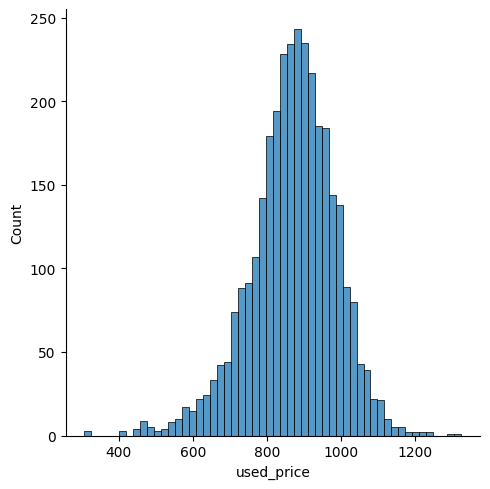

In [17]:
sns.displot((df5['used_price']));

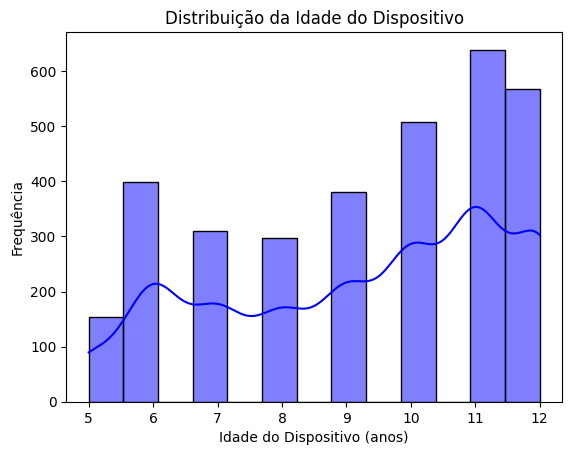

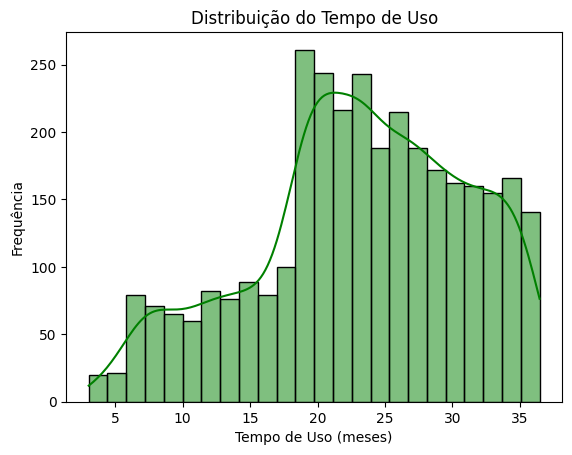

In [18]:
# Visualizar a distribuição de 'idade_do_dispositivo'
sns.histplot(df4['idade_do_dispositivo'], kde=True, color='blue')
plt.title('Distribuição da Idade do Dispositivo')
plt.xlabel('Idade do Dispositivo (anos)')
plt.ylabel('Frequência')
plt.show()

# Visualizar a distribuição de 'tempo_de_uso'
sns.histplot(df4['tempo_de_uso'], kde=True, color='green')
plt.title('Distribuição do Tempo de Uso')
plt.xlabel('Tempo de Uso (meses)')
plt.ylabel('Frequência')
plt.show()


## 5.1 Analise Bivariada

### 5.1.1 Marcas mais valorizadas: Comparar o preço médio de revenda por marca

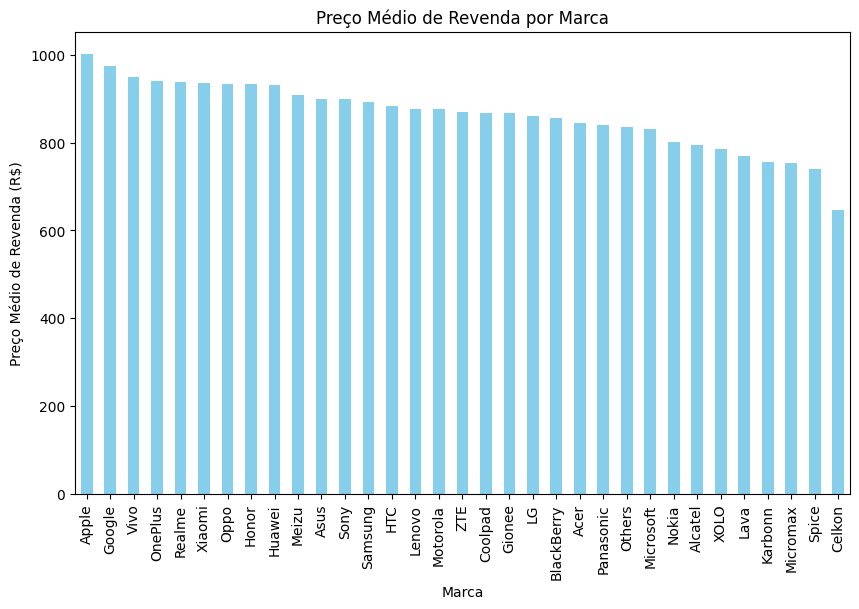

In [19]:
preco_medio_marca = df5.groupby('device_brand')['used_price'].mean().sort_values(ascending=False)

# Visualizar
plt.figure(figsize=(10,6))
preco_medio_marca.plot(kind='bar', color='skyblue')
plt.title('Preço Médio de Revenda por Marca')
plt.xlabel('Marca')
plt.ylabel('Preço Médio de Revenda (R$)')
plt.show()

*O preço de revenda da Apple é o maior logo em seguida Google e Vivo ( China, provavelmente )*

### 5.1.2 Impacto do ano de lançamento no preço: Dispositivos mais antigos desvalorizam mais rápido?
- entender como o ano de lançamento impacta o preço de revenda.

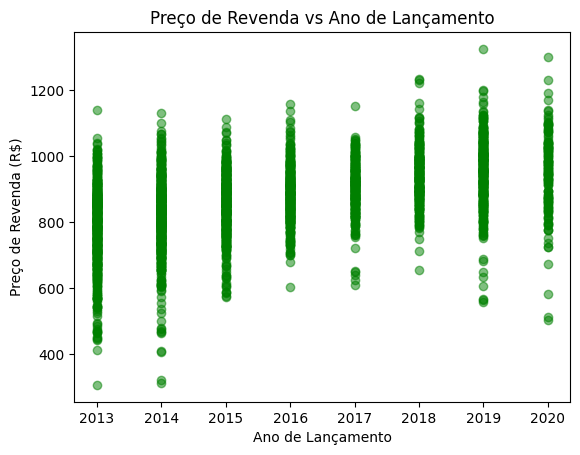

Correlação entre ano de lançamento e preço: 0.502369531093799


In [20]:
# Gráfico de dispersão
plt.scatter(df5['release_year'], df5['used_price'], alpha=0.5, color='green')
plt.title('Preço de Revenda vs Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Preço de Revenda (R$)')
plt.show()

# Correlação
correlacao_ano_preco = df5[['release_year', 'used_price']].corr()
print(f"Correlação entre ano de lançamento e preço: {correlacao_ano_preco.loc['release_year', 'used_price']}")


### 5.1.3 Efeito da presença de 4G/5G: Celulares com 5G são vendidos por preços mais altos?


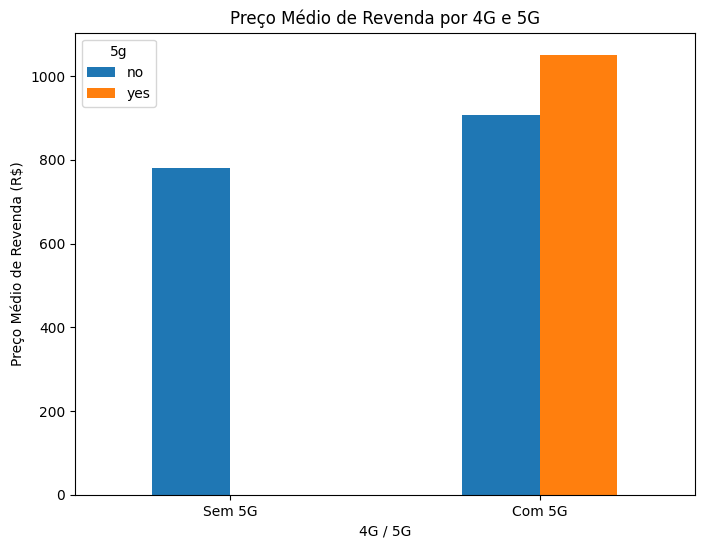

In [21]:
# Agrupar por presença de 4G/5G e calcular a média
preco_4g_5g = df5.groupby(['4g', '5g'])['used_price'].mean()

# Visualizar
preco_4g_5g.unstack().plot(kind='bar', figsize=(8,6))
plt.title('Preço Médio de Revenda por 4G e 5G')
plt.xlabel('4G / 5G')
plt.ylabel('Preço Médio de Revenda (R$)')
plt.xticks([0, 1], ['Sem 5G', 'Com 5G'], rotation=0)
plt.show()


### 5.1.4 Outras analises

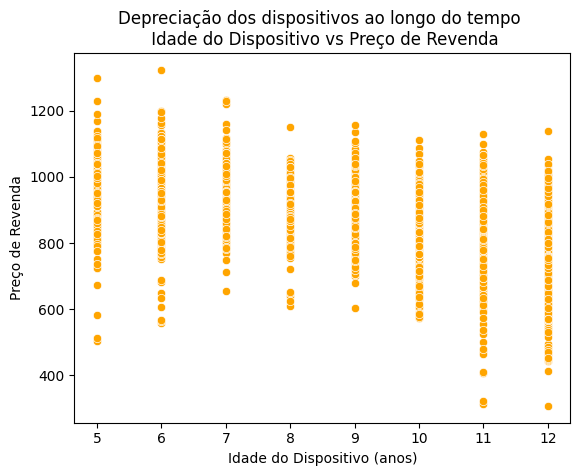

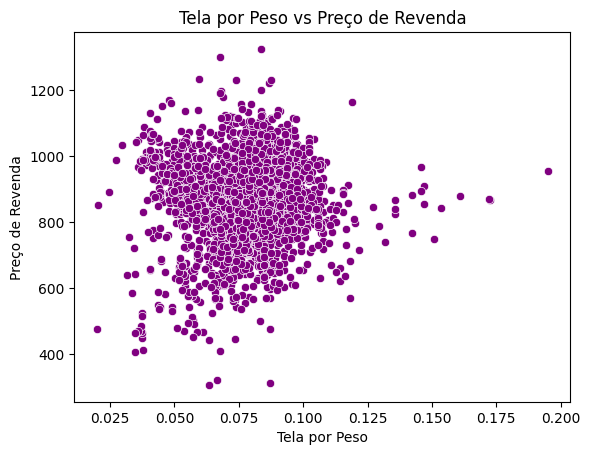

In [22]:
# Dispersão entre 'idade_do_dispositivo' e 'used_price'
sns.scatterplot(x=df4['idade_do_dispositivo'], y=df4['used_price'], color='orange')
plt.title('Depreciação dos dispositivos ao longo do tempo \n Idade do Dispositivo vs Preço de Revenda')
plt.xlabel('Idade do Dispositivo (anos)')
plt.ylabel('Preço de Revenda')
plt.show()

# Dispersão entre 'tela_por_peso' e 'used_price'
sns.scatterplot(x=df4['tela_por_peso'], y=df4['used_price'], color='purple')
plt.title('Tela por Peso vs Preço de Revenda')
plt.xlabel('Tela por Peso')
plt.ylabel('Preço de Revenda')
plt.show()


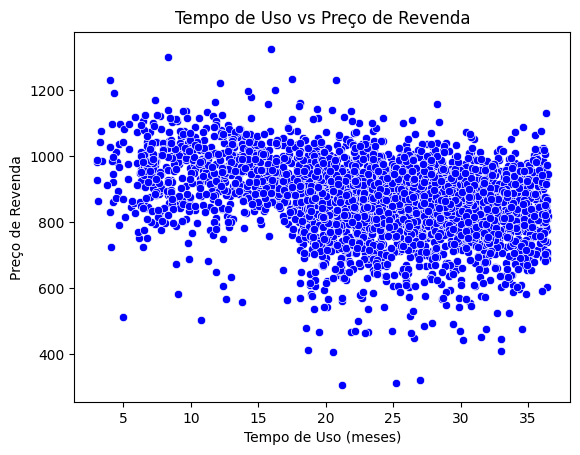

In [23]:
# Comparar preço de revenda com o tempo de uso
sns.scatterplot(x=df4['tempo_de_uso'], y=df4['used_price'], color='blue')
plt.title('Tempo de Uso vs Preço de Revenda')
plt.xlabel('Tempo de Uso (meses)')
plt.ylabel('Preço de Revenda')
plt.show()


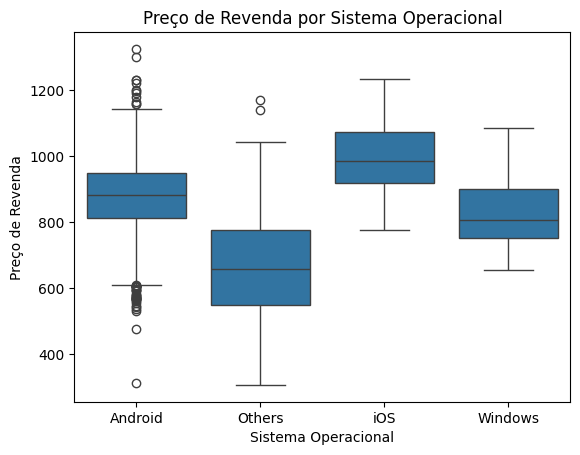

In [24]:
# Comparar preço de revenda por sistema operacional
sns.boxplot(x=df4['os'], y=df4['used_price'])
plt.title('Preço de Revenda por Sistema Operacional')
plt.xlabel('Sistema Operacional')
plt.ylabel('Preço de Revenda')
plt.show()

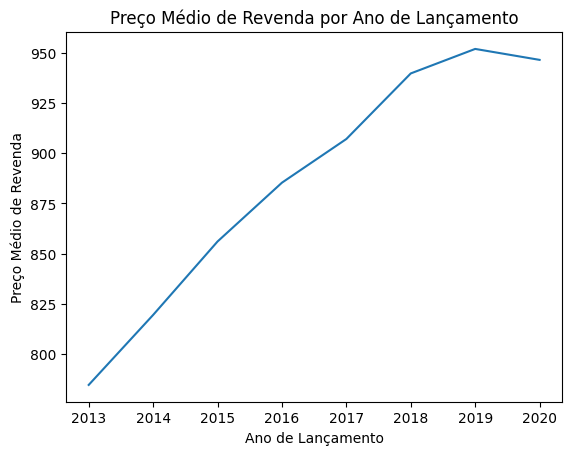

In [25]:
# Preço médio de revenda por ano de lançamento
preco_medio_ano = df4.groupby('release_year')['used_price'].mean().reset_index()

sns.lineplot(data=preco_medio_ano, x='release_year', y='used_price')
plt.title('Preço Médio de Revenda por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Preço Médio de Revenda')
plt.show()

## 5.2 Analise Multivariada

### 5.2.1 Correlação geral vs Correlação em relação a "used_price"

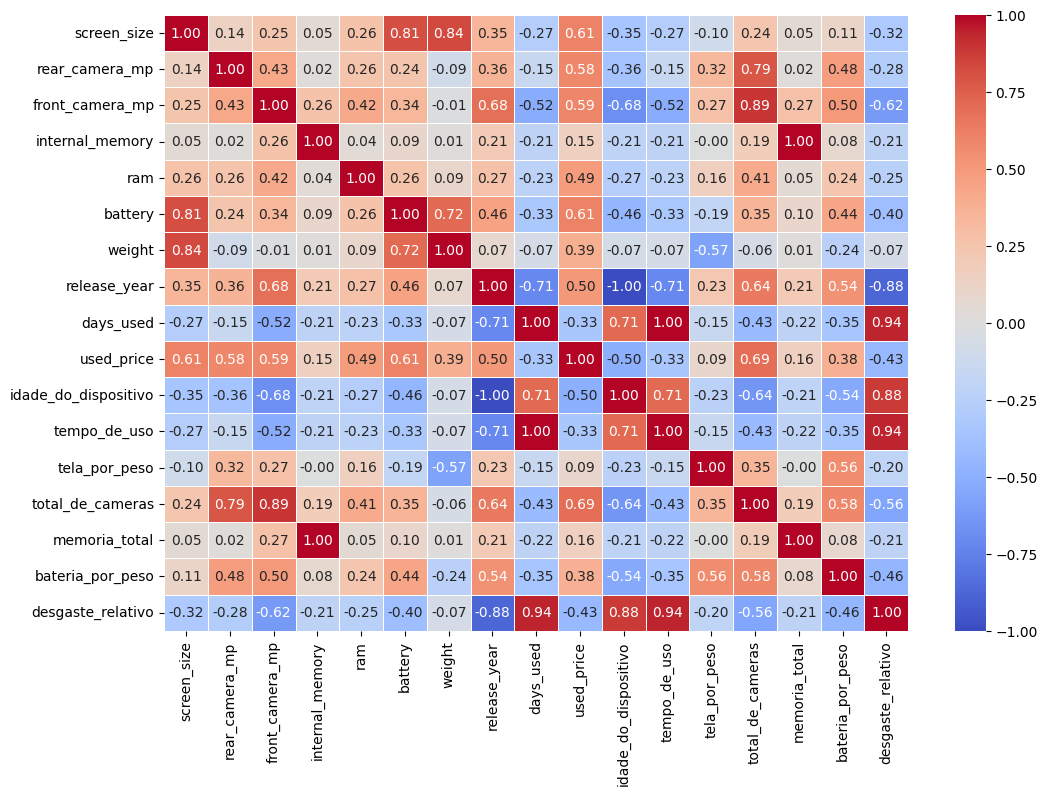

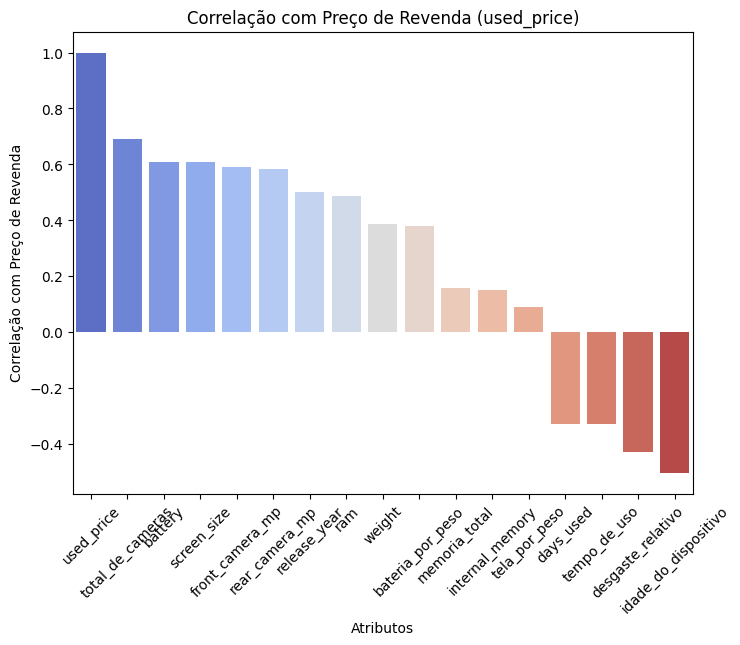

In [26]:
num_attributes = df4.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])

# Calcular a matriz de correlação
correlation_matrix = num_attributes.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

# Calcular a correlação com 'used_price'
correlation_with_price = num_attributes.corr()['used_price'].sort_values(ascending=False)

# Visualizar a correlação com 'used_price'
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='coolwarm')
plt.title('Correlação com Preço de Revenda (used_price)')
plt.xlabel('Atributos')
plt.ylabel('Correlação com Preço de Revenda')
plt.xticks(rotation=45)
plt.show()



# 6.0 Data Preparation

In [27]:

from sklearn.preprocessing import LabelEncoder

In [28]:
df6 = df5.copy()

In [29]:
df6['4g'] = df6['4g'].apply(lambda x: 1 if x == 'yes' else 0)
df6['5g'] = df6['5g'].apply(lambda x: 1 if x == 'yes' else 0)


# Criando LabelEncoders
label_enc_brand = LabelEncoder()
label_enc_os = LabelEncoder()

# Ajustando os encoders com os dados de treinamento (df6 é o DataFrame de treino)
df6["device_brand"] = label_enc_brand.fit_transform(df6["device_brand"])
df6["os"] = label_enc_os.fit_transform(df6["os"])


# 7.0 Feature Selection

In [30]:
df7 = df6.copy()

# 8.0 Hyperparameter Fine-Tunning

In [31]:
df8 = df7.copy()

In [32]:
X = df8.drop(columns="used_price")
y = df8['used_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamanhos do Conjunto de Treino e Teste:")
print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

Tamanhos do Conjunto de Treino e Teste:
Treino: (2277, 20), Teste: (976, 20)


## Linear Regression

In [33]:
from sklearn.linear_model import RidgeCV, LassoCV

# Testando Ridge Regression com validação cruzada
ridge = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
ridge.fit(X_train, y_train)
print("Melhor alpha (Ridge):", ridge.alpha_)

# Testando Lasso Regression com validação cruzada
lasso = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
lasso.fit(X_train, y_train)
print("Melhor alpha (Lasso):", lasso.alpha_)


Melhor alpha (Ridge): 0.01
Melhor alpha (Lasso): 0.01


## RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definição do modelo base
rf = RandomForestRegressor(random_state=42)

# Grade de hiperparâmetros
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="r2", verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo e avaliação
melhores_parametros_rf = grid_search.best_params_
print("Melhores parâmetros para RF:", melhores_parametros_rf)
melhor_rf = grid_search.best_estimator_
print(f"R² no teste: {melhor_rf.score(X_test, y_test):.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores parâmetros para RF: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R² no teste: 0.8039


## XGBRegressor

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Modelo base
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Grade de hiperparâmetros
param_dist = {
    "n_estimators": np.arange(50, 500, 50),
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": np.arange(3, 10, 1),
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

# Random Search
random_search = RandomizedSearchCV(xgb, param_dist, n_iter=20, cv=5, scoring="r2", verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Melhor modelo
melhores_parametros_xgb = random_search.best_params_
print("Melhores parâmetros para XGBoost:", melhores_parametros_xgb)
melhor_xgb = random_search.best_estimator_
print(f"R² no teste: {melhor_xgb.score(X_test, y_test):.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores parâmetros para XGBoost: {'subsample': 0.8, 'n_estimators': np.int64(200), 'max_depth': np.int64(3), 'learning_rate': 0.05, 'colsample_bytree': 0.8}
R² no teste: 0.8247


# 9.0 Model Training


In [36]:
df9 = df8.copy()

## LinearRegression


In [37]:
from sklearn.linear_model import LinearRegression

modelo_line_reg = LinearRegression()
modelo_line_reg.fit(X_train, y_train)

LinearRegression()

MAE: 43.89
RMSE: 60.13
R²: 0.75


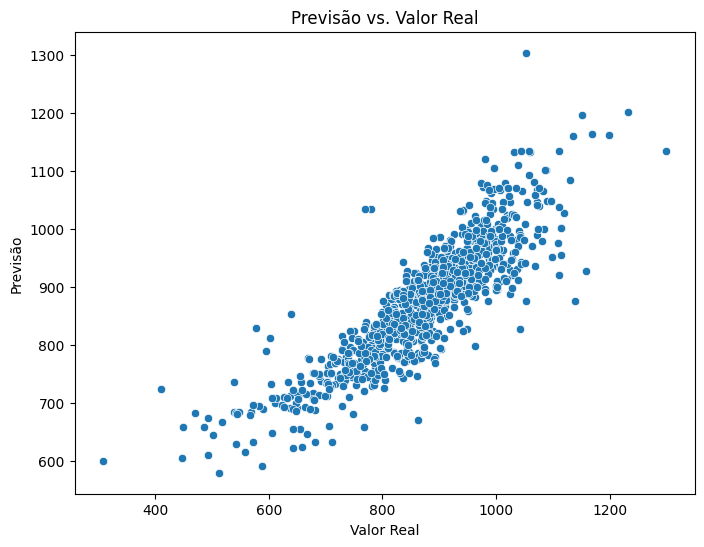

In [38]:
# 7. Fazer previsões
y_pred_line_reg = modelo_line_reg.predict(X_test)

# 8. Avaliar o modelo_line_reg
mae = mean_absolute_error(y_test, y_pred_line_reg)
mse = mean_squared_error(y_test, y_pred_line_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_line_reg)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 9. Visualizar resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_line_reg)
plt.xlabel("Valor Real")
plt.ylabel("Previsão")
plt.title("Previsão vs. Valor Real")
plt.show()

## RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

modelo_rand_fore = RandomForestRegressor(**melhores_parametros_rf)
modelo_rand_fore.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

MAE: 39.81
RMSE: 53.20
R²: 0.81


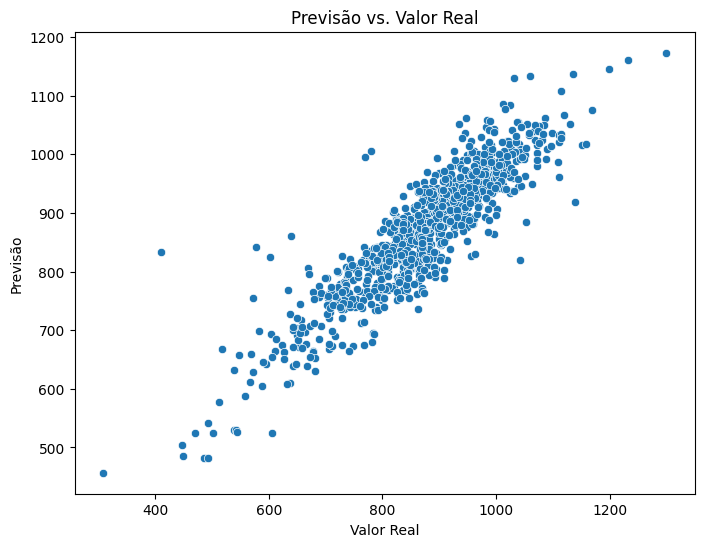

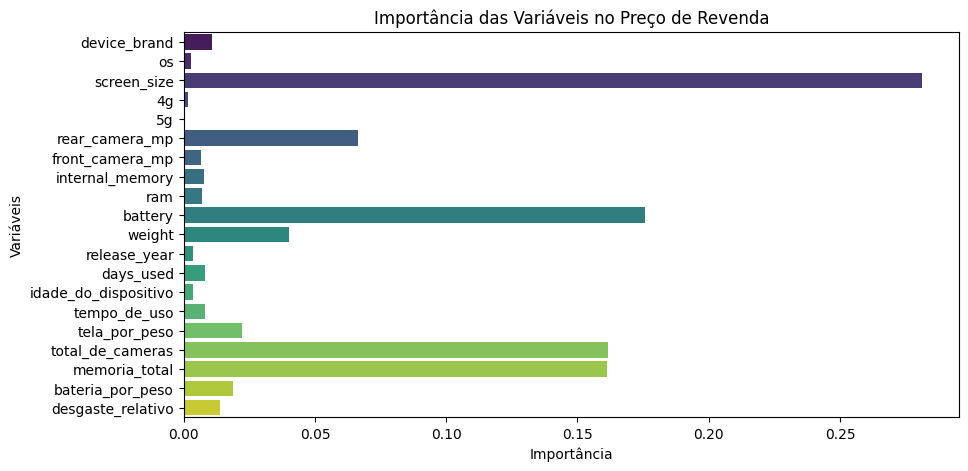

In [40]:
# 7. Fazer previsões
y_pred_rand_fore = modelo_rand_fore.predict(X_test)

# 8. Avaliar o modelo_rand_fore
mae = mean_absolute_error(y_test, y_pred_rand_fore)
mse = mean_squared_error(y_test, y_pred_rand_fore)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rand_fore)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 9. Visualizar resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rand_fore)
plt.xlabel("Valor Real")
plt.ylabel("Previsão")
plt.title("Previsão vs. Valor Real")
plt.show()

# Obter importância das variáveis
importances = modelo_rand_fore.feature_importances_
feature_names = X.columns

# Criar um gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Importância das Variáveis no Preço de Revenda")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.show()

## XGBRegressor

In [41]:
from xgboost import XGBRegressor

modelo_xgb = XGBRegressor(**melhores_parametros_xgb)
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=np.int64(3), max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=np.int64(200), n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

MAE: 38.21
RMSE: 50.28
R²: 0.83


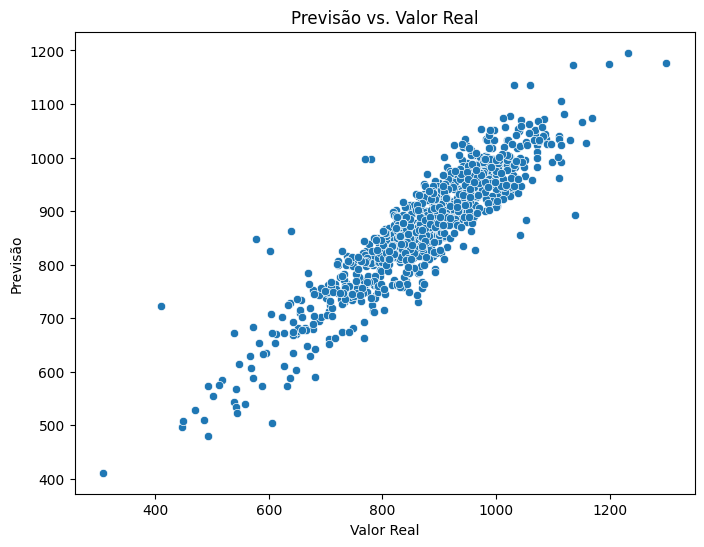

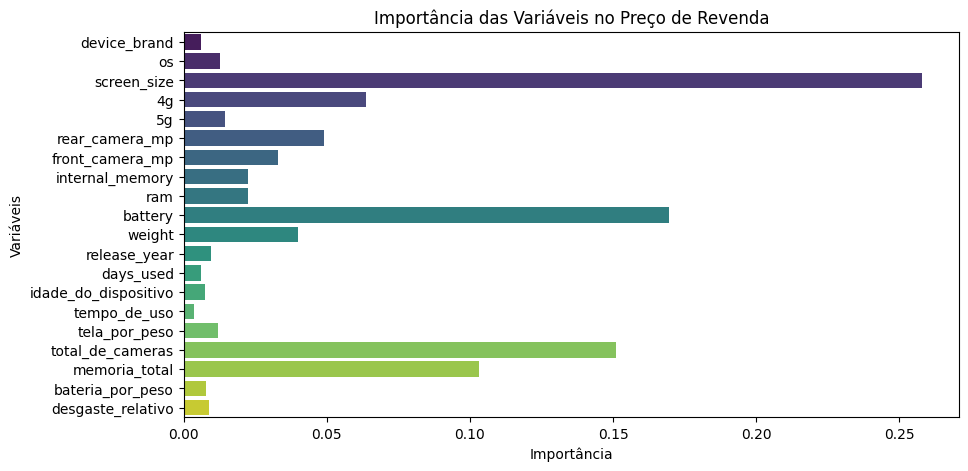

In [48]:
# 7. Fazer previsões
y_pred_xgb = modelo_xgb.predict(X_test)

# 8. Avaliar o modelo_xgb
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 9. Visualizar resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.xlabel("Valor Real")
plt.ylabel("Previsão")
plt.title("Previsão vs. Valor Real")
plt.show()

# Obter importância das variáveis
importances = modelo_xgb.feature_importances_
feature_names = X.columns

# Criar um gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Importância das Variáveis no Preço de Revenda")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.show()


# 11 Model Translation

In [49]:
def prever_preco(modelo, dispositivo, label_enc_brand=None, label_enc_os=None):

    # Copia o dicionário para evitar modificar o original
    disp = dispositivo.copy()

    # Aplicar Label Encoding usado no treinamento
    if label_enc_brand:
        disp["device_brand"] = label_enc_brand.transform([disp["device_brand"]])[0]
    if label_enc_os:
        disp["os"] = label_enc_os.transform([disp["os"]])[0]

    from datetime import datetime

    ano_atual = datetime.now().year
    disp['idade_do_dispositivo'] = ano_atual - disp['release_year']
    disp['tempo_de_uso'] = disp['days_used'] / 30
    disp['tela_por_peso'] = disp['screen_size'] / disp['weight'] # densidade e portabilidade do dispositivo. Se for pesado, deve ter um foco para atividades pesadas.
    disp['total_de_cameras'] = disp['rear_camera_mp'] + disp['front_camera_mp'] # indicar que o dispositivo tem foco em camera
    disp['memoria_total'] = disp['internal_memory'] + disp['ram'] # por mais que sejam diferentes, as pessoas sem conhecimento deve pensar " mais igual melhor"
    disp['bateria_por_peso'] = disp['battery'] / disp['weight'] # mesma idade do tela por peso. Sera que elas tem correlação?
    disp['desgaste_relativo'] = disp['idade_do_dispositivo'] * disp['tempo_de_uso'] # dispositivos mais antigos e com mais tempo de uso tendem a ter maior desgaste


    # Criar DataFrame de 1 linha
    df_disp = pd.DataFrame([disp])

    # Fazer a previsão
    preco = modelo.predict(df_disp)[0]

    return preco


In [50]:
baseline_model = {
    "device_brand": "Samsung",
    "os": "Android",
    "screen_size": 6.5,
    "4g": 1,
    "5g": 1,
    "rear_camera_mp": 64,
    "front_camera_mp": 32,
    "internal_memory": 128,
    "ram": 8,
    "battery": 4000,
    "weight": 180,
    "release_year": 2023,
    "days_used": 100}

In [53]:
# Exemplo de um novo dispositivo
novo_dispositivo = {
    "device_brand": "Samsung",
    "os": "Android",
    "screen_size": 6.5,
    "4g": 1,
    "5g": 1,
    "rear_camera_mp": 64,
    "front_camera_mp": 32,
    "internal_memory": 128,
    "ram": 32,
    "battery": 4000,
    "weight": 180,
    "release_year": 2023,
    "days_used": 100}

iphone_geracao_nova = {
    "device_brand": "Apple",
    "os": "iOS",
    "screen_size": 6.1,  # iPhone 15 tem tela de 6.1 polegadas
    "4g": 1,  # Suporta 4G
    "5g": 1,  # Suporta 5G
    "rear_camera_mp": 48,  # Câmera principal de 48 MP
    "front_camera_mp": 12,  # Câmera frontal de 12 MP
    "internal_memory": 256,  # Modelos com 256 GB de memória interna
    "ram": 6,  # iPhone 15 tem 6 GB de RAM
    "battery": 3349,  # Capacidade da bateria (mAh)
    "weight": 174,  # Peso do iPhone 15
    "release_year": 2023,  # Ano de lançamento
    "days_used": 50  # Supondo que tenha sido usado por 50 dias
}


In [54]:
preco_previsto = prever_preco(modelo_line_reg, iphone_geracao_nova, label_enc_brand, label_enc_os)
print(f"Preço previsto (modelo Linear Regression): R$ {preco_previsto:.2f}")
preco_previsto = prever_preco(modelo_xgb, iphone_geracao_nova, label_enc_brand, label_enc_os)
print(f"Preço previsto (modelo XGB): R$ {preco_previsto:.2f}")
preco_previsto = prever_preco(modelo_rand_fore, iphone_geracao_nova, label_enc_brand, label_enc_os)
print(f"Preço previsto (modelo random forest): R$ {preco_previsto:.2f}")

Preço previsto (modelo Linear Regression): R$ 1247.59
Preço previsto (modelo XGB): R$ 1095.14
Preço previsto (modelo random forest): R$ 998.60
